<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/exporting_latent_codes_pca_t_sne_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [2]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [3]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [4]:
PATH = '/content/drive/My Drive/aa_images/28-nov/' #@param{type:'string'}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [5]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [6]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [7]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [8]:
#np.array(file_list)

### Preview

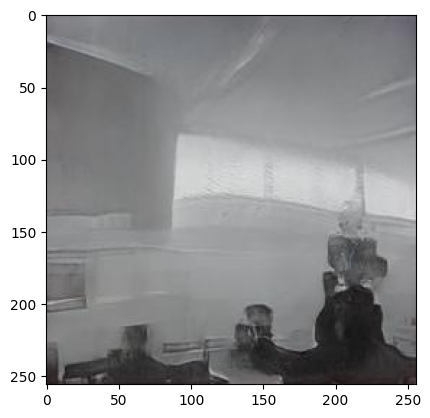

In [10]:
# Initialize the image stack with the first image
img = cv.imread(PATH + '0.jpg') # Mind the naming pattern
#print(img)
plt.imshow(img)

## PCA (principal component analysis)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv


In [11]:
num_imgs = 64

In [12]:

img_gray = color.rgb2gray(img) # Convert rgb image to greyscale

3#img_gray = img

# Set the new size for the image
new_size = (256, 256)

# Resize the image
img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

im_stack = np.asarray(img_gray)

print(str(im_stack) + '__1')


# Concatenate additional images to the stack
for i in range(0, num_imgs):
    img = cv.imread(PATH + str(i) + '.jpg')
    img_gray = color.rgb2gray(img)

    # Set the new size for the image
    new_size = (256, 256)

    # Resize the image
    img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

    im_array = np.asarray(img_gray)
    im_stack = np.append(im_stack, im_array)
    print(str(im_stack) + '__' + str(i))
    print(len(im_stack))

[[0.55490549 0.54314078 0.53137608 ... 0.38013137 0.36836667 0.35660196]
 [0.52353294 0.51176824 0.5039251  ... 0.38797451 0.38013137 0.37228824]
 [0.49216039 0.48823882 0.48431725 ... 0.40366078 0.39581765 0.38797451]
 ...
 [0.14306549 0.14698706 0.1548302  ... 0.24669294 0.25061451 0.26237922]
 [0.14698706 0.14306549 0.14306549 ... 0.19963412 0.21532039 0.24277137]
 [0.1548302  0.14306549 0.12737922 ... 0.18394784 0.21139882 0.25453608]]__1
[0.55490549 0.54314078 0.53137608 ... 0.18394784 0.21139882 0.25453608]__0
131072
[0.55490549 0.54314078 0.53137608 ... 0.19688902 0.21257529 0.23218314]__1
196608
[0.55490549 0.54314078 0.53137608 ... 0.31033176 0.37307686 0.46327294]__2
262144
[0.55490549 0.54314078 0.53137608 ... 0.64702118 0.62349176 0.69015843]__3
327680
[0.55490549 0.54314078 0.53137608 ... 0.12040706 0.10920784 0.09352157]__4
393216
[0.55490549 0.54314078 0.53137608 ... 0.24394784 0.25571255 0.29492824]__5
458752
[0.55490549 0.54314078 0.53137608 ... 0.13414392 0.12630078 0

In [14]:
# PCA algorithm
def PCA(matrix):
    #matrix = matrix.reshape(-1, 1)
    matrix = np.split(matrix, num_imgs)
    #print(matrix)
    num_comp = 3 #@param{type:'slider', min:0, max:100, step:1}

    pca = dp.PCA(n_components = num_comp) # load the PCA algorithm, set the principal component after dimensionality reduction to n_components
    pca_features = pca.fit_transform(matrix) # dimensionality reduction on raw data
    print(pca_features[0])
    print(pca_features[1])

    for i in range(num_imgs):
        print(pca_features[i])

    return pca_features

#print(img_gray)
low_matrix = PCA(im_stack)

[-17.27907369  24.34268018  16.05542108]
[-15.9537409   26.24940845  14.91646481]
[-17.27907369  24.34268018  16.05542108]
[-15.9537409   26.24940845  14.91646481]
[-17.63455513  14.25268886 -16.4040946 ]
[-23.46212858  -3.13052579  -5.33069515]
[44.12039954 19.0530228  -1.68611122]
[33.88801861 24.07081244 17.38385036]
[28.77901791 29.45702899 -7.92623948]
[48.26973217 21.60888458 -2.79515262]
[16.20224713 11.41690129 -2.29363372]
[17.55061067 27.2581971  -1.69961961]
[37.51263826 14.4690785  -5.03868968]
[ 30.52717395  25.05035628 -20.69877218]
[-27.78319025  12.22458409  -3.12237214]
[11.2041483  21.85347734 -8.54283336]
[18.97824926  7.13294726 40.80023509]
[36.38193795  8.52254579 32.39757531]
[25.09697172 13.20033908 -5.30977467]
[-20.12557364   6.61680345 -12.79267967]
[13.64246237 22.19236004 -4.93042708]
[ 31.85356063 -13.41228162  18.20543821]
[ 43.63745809 -19.63567307 -11.22927402]
[ 19.1199268  -27.65504245   5.88483511]
[ 26.61813727 -22.84484756   0.48493318]
[19.3651437

## T-SNE (t-distributed stochastic neighbor embedding)

In [15]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time

_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(num_imgs):
    print(output[i])


[75.66194915771484, 61.18111038208008, 13.345926284790039]
[-68.97451782226562, 51.25861358642578, -24.13628387451172]
[-4.414309978485107, 28.942468643188477, 12.357531547546387]
[-4.478407859802246, 19.7156925201416, 83.22650909423828]
[75.67334747314453, -38.168155670166016, -85.90904235839844]
[94.7166976928711, -14.259395599365234, -51.09855270385742]
[-57.79821014404297, -125.2348403930664, 20.0946102142334]
[63.656089782714844, -47.88179397583008, -54.864036560058594]
[15.694412231445312, 4.718654632568359, -91.7126693725586]
[45.20643615722656, 17.68457794189453, -57.22407913208008]
[38.47075271606445, -40.79528045654297, -85.2117691040039]
[67.19189453125, 6.299628734588623, -107.13593292236328]
[-19.228506088256836, 68.14938354492188, 43.15756607055664]
[31.016752243041992, 41.17452621459961, -88.6017074584961]
[-109.9577407836914, -53.74652862548828, -37.92327880859375]
[-83.49361419677734, -64.70580291748047, -60.64019012451172]
[-16.856136322021484, -42.38267135620117, -17

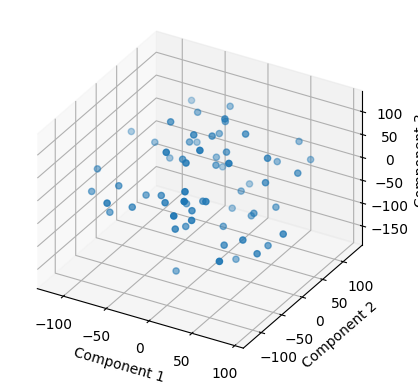

In [20]:
# Plotting the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective (orthographic projection)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2])
ax.set_proj_type('ortho')  # Setting orthographic projection

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()


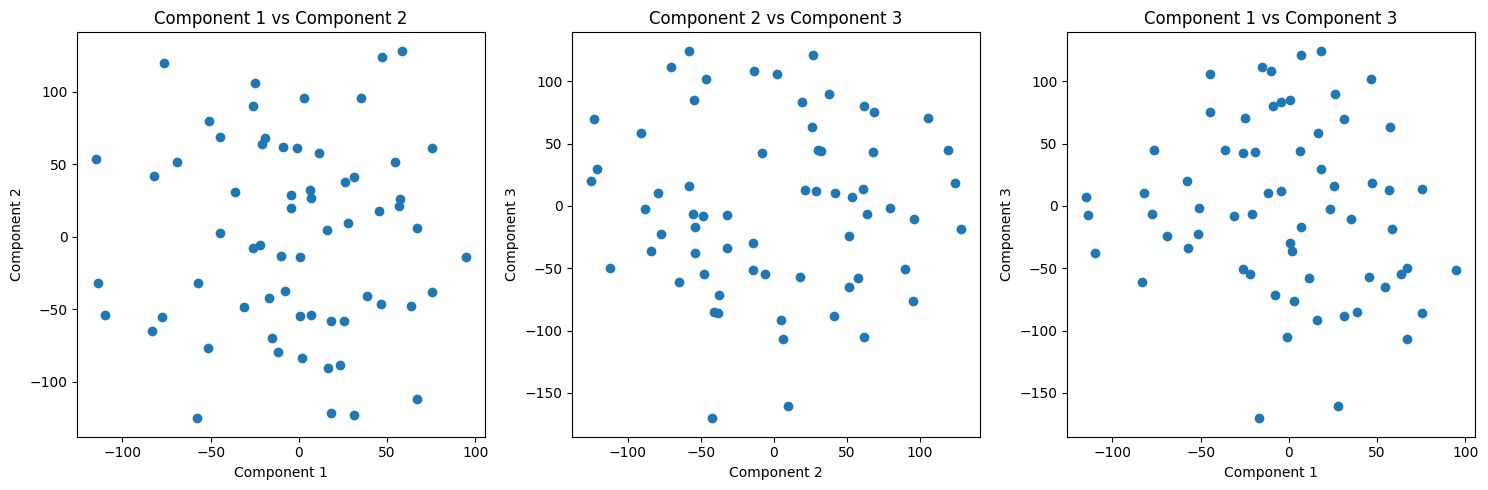

In [21]:
# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Component 1 vs Component 2
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1])
axs[0].set_title('Component 1 vs Component 2')
axs[0].set_xlabel('Component 1')
axs[0].set_ylabel('Component 2')

# Component 2 vs Component 3
axs[1].scatter(X_tsne[:, 1], X_tsne[:, 2])
axs[1].set_title('Component 2 vs Component 3')
axs[1].set_xlabel('Component 2')
axs[1].set_ylabel('Component 3')

# Component 1 vs Component 3
axs[2].scatter(X_tsne[:, 0], X_tsne[:, 2])
axs[2].set_title('Component 1 vs Component 3')
axs[2].set_xlabel('Component 1')
axs[2].set_ylabel('Component 3')

# Display the plots
plt.tight_layout()
plt.show()


## Save CSV

In [ ]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'latent_space_mix' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

## Save Model

In [ ]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""